In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.exceptions import QiskitMachineLearningError
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

In [5]:
optimizer = COBYLA(maxiter = 120, tol = 0.001)

In [6]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait = True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [7]:
data = load_iris()
data_df = pd.DataFrame(data = data.data, columns = data.feature_names)
data_df["target"] = data.target

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X_data = data_df.iloc[:, range(0,4)]
Y_data = data_df["target"]

In [11]:
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [10]:
scaler_mm = MinMaxScaler()
X_data_temp = scaler_mm.fit_transform(X_data)
X_data_temp[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

In [11]:
Y_data = np.array(Y_data)

In [12]:
ohe_transformer = OneHotEncoder(sparse = False)
Y_data_temp = ohe_transformer.fit_transform(Y_data.reshape(-1,1))
Y_data_temp[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
Y_data_temp[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
algorithm_globals.random_seed = 123

In [15]:
features = X_data.shape[1]
features

4

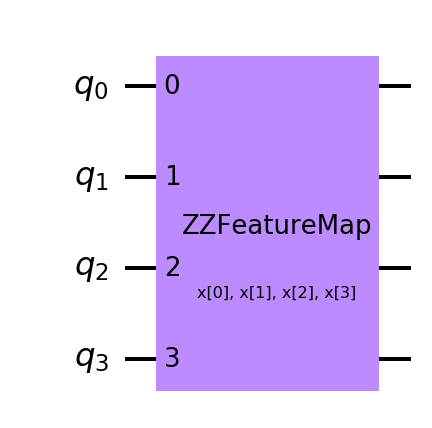

In [16]:
ZZ_feature_map = ZZFeatureMap(feature_dimension = features, reps = 1, entanglement = "full")
ZZ_feature_map.draw('mpl')

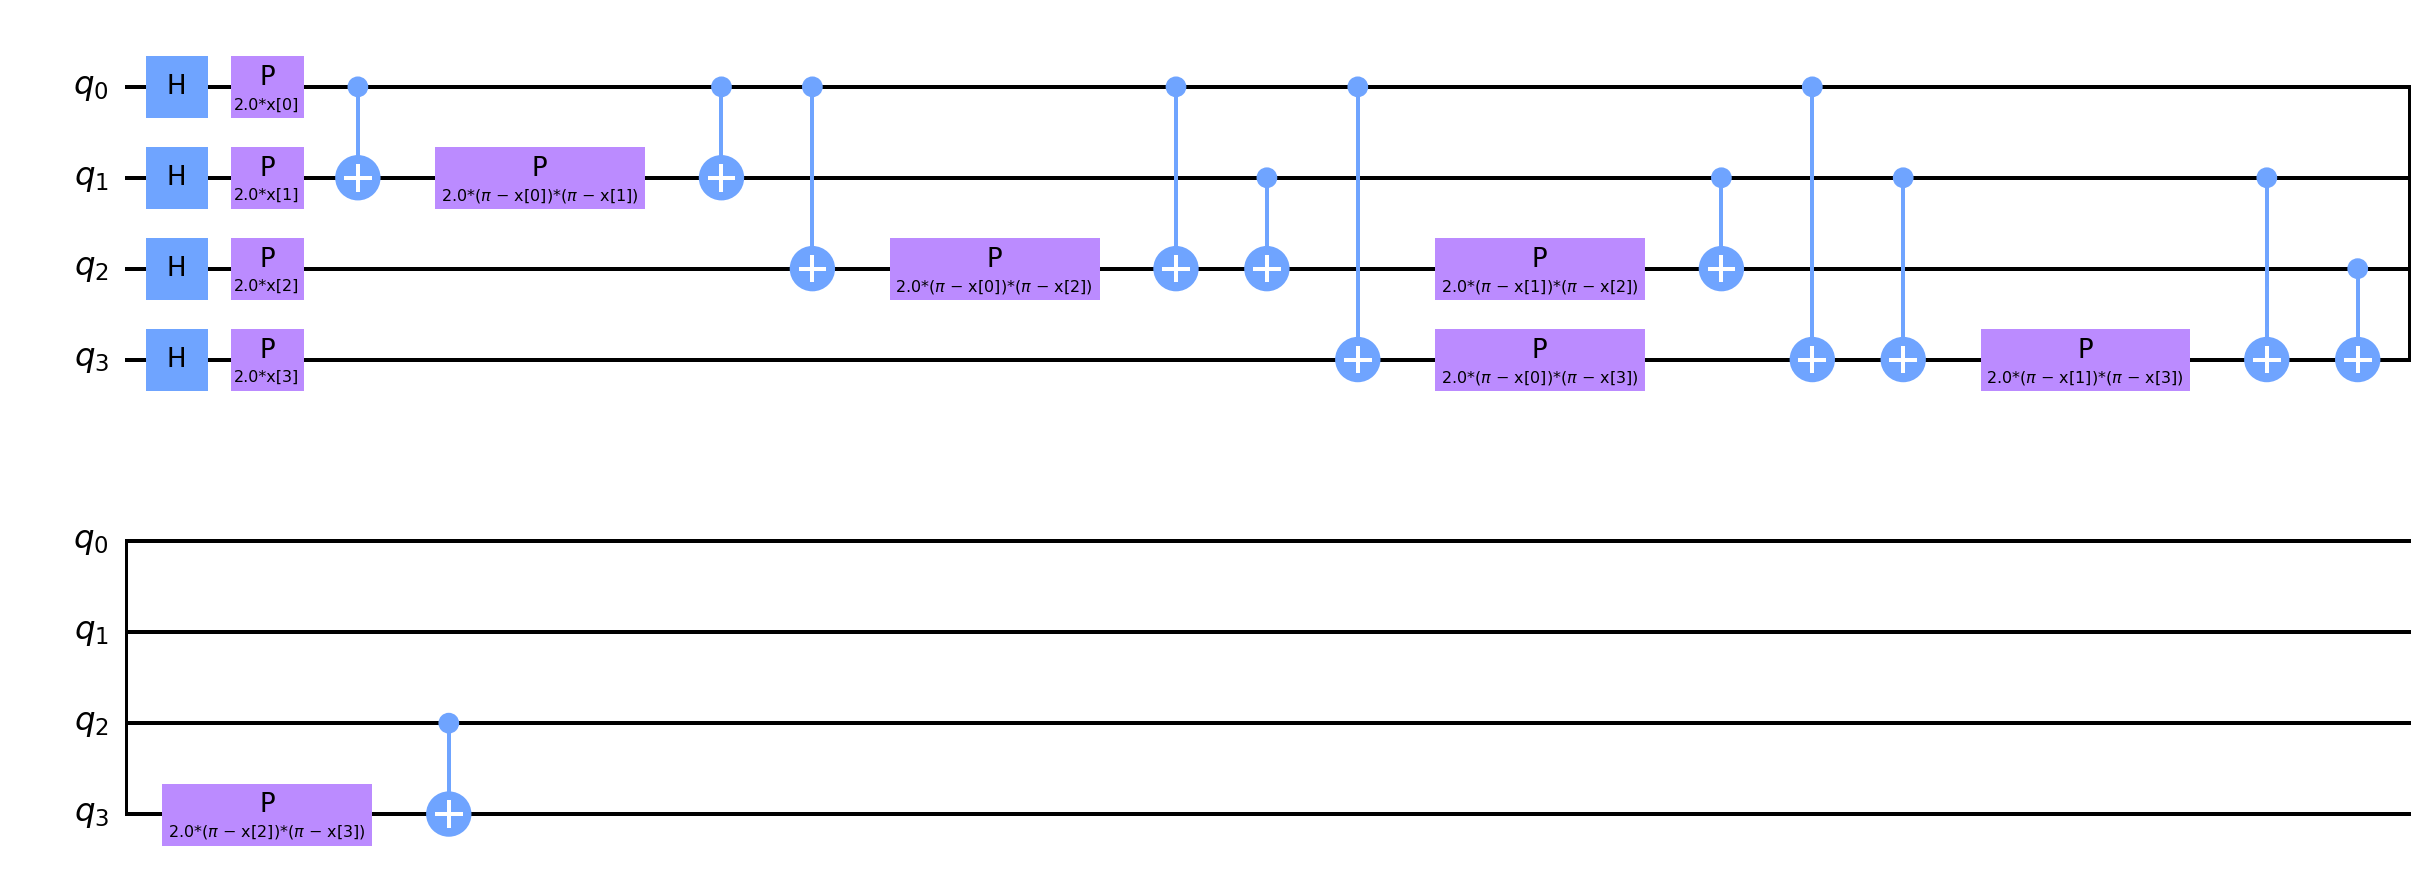

In [17]:
ZZ_feature_map.decompose().draw('mpl')

In [18]:
num_qubits = features
#variational_circ = RealAmplitudes(num_qubits = num_qubits, reps = 4, entanglement = "full")
variational_circ = EfficientSU2(num_qubits = num_qubits, reps = 4, entanglement = "full")

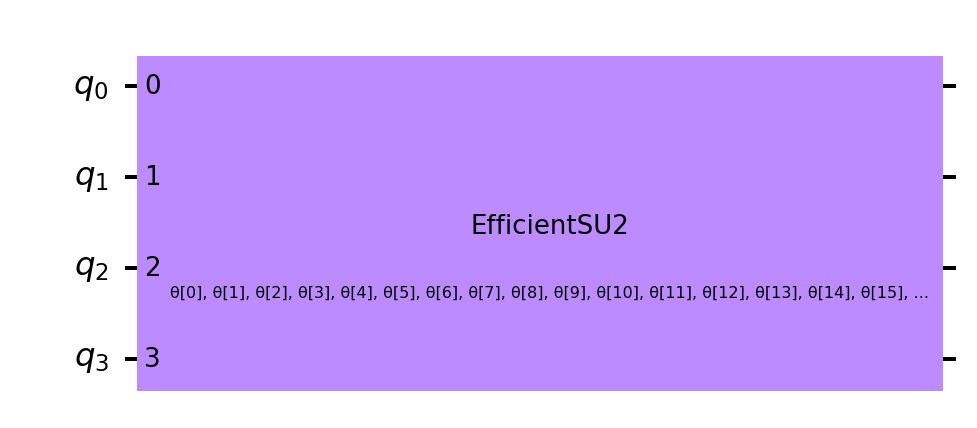

In [19]:
variational_circ.draw('mpl')

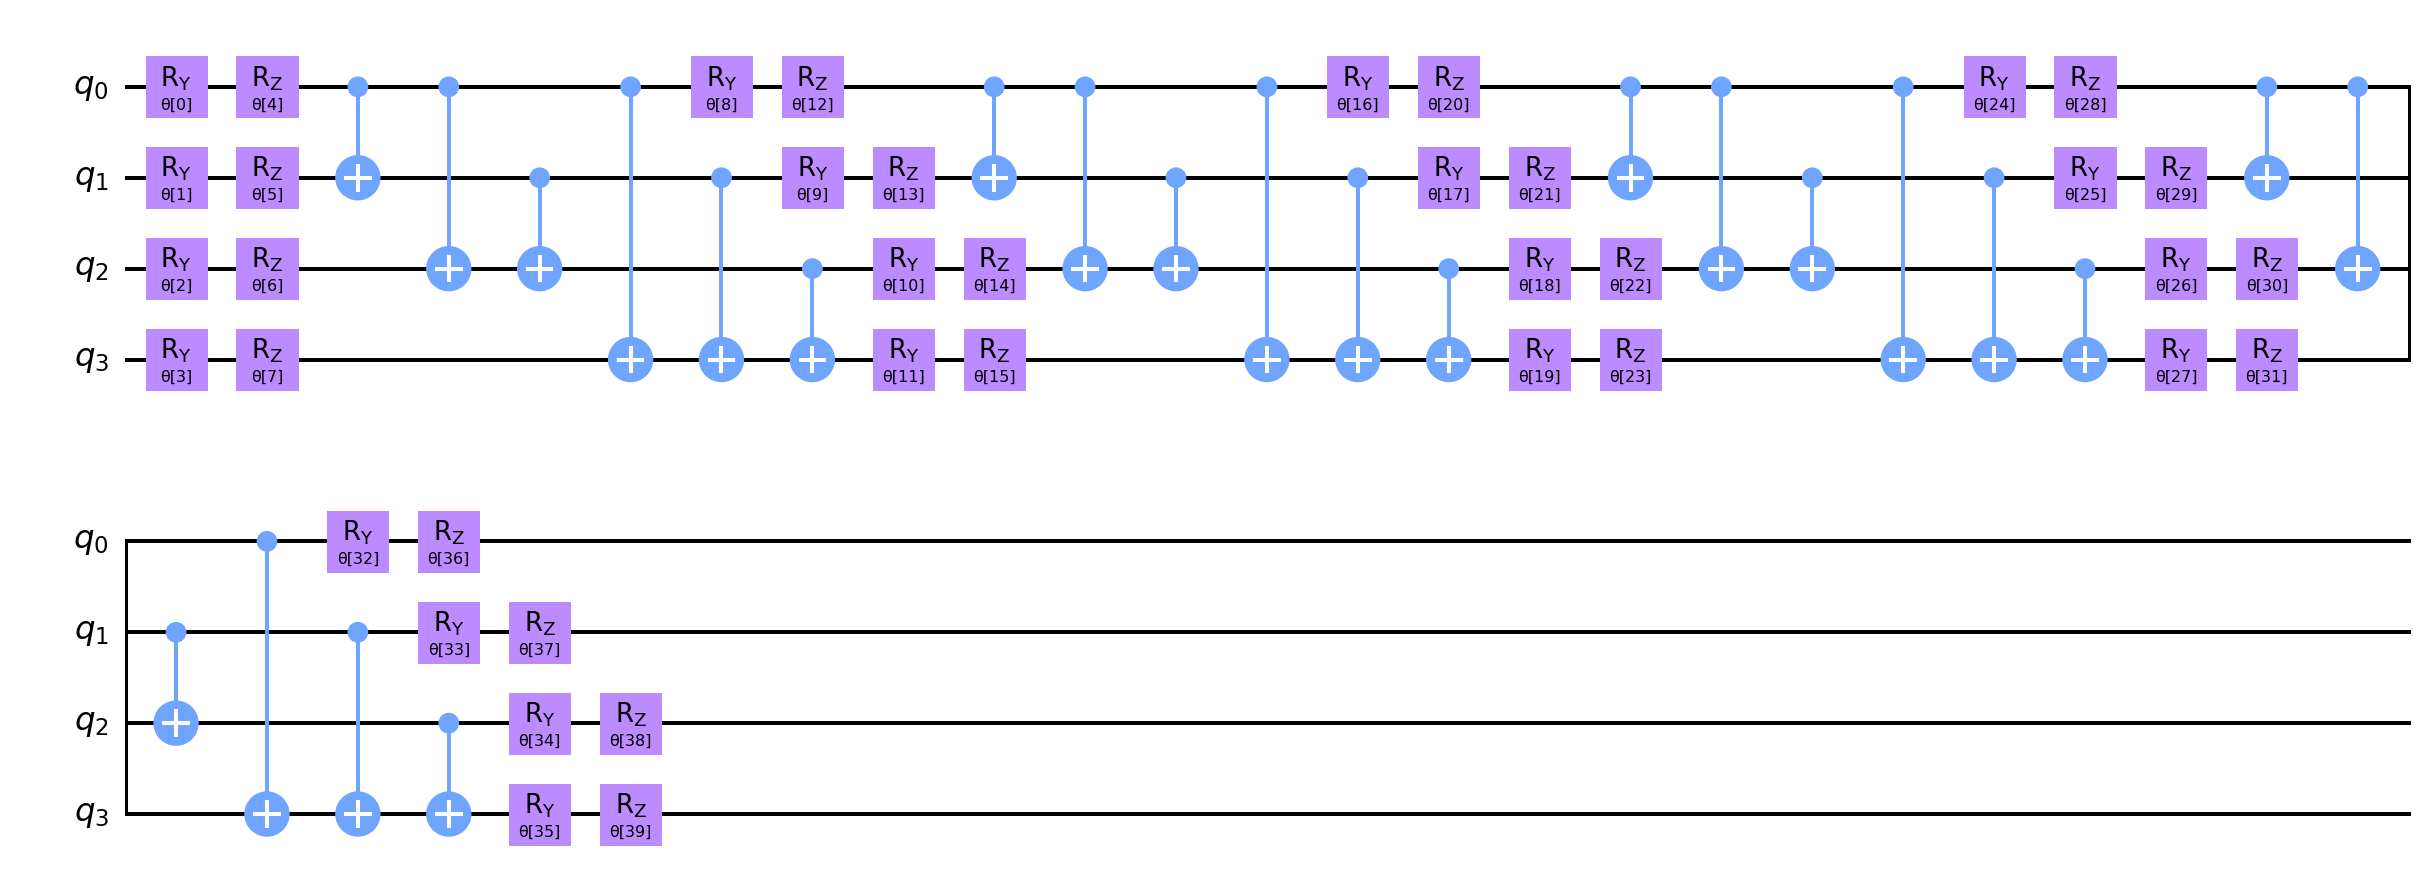

In [20]:
variational_circ.decompose().draw('mpl')

In [21]:
backend = Aer.get_backend('statevector_simulator')

In [22]:
quantum_instance = QuantumInstance(backend, shots = 1024, seed_simulator = algorithm_globals.random_seed, seed_transpiler = algorithm_globals.random_seed)

In [23]:
variational_circ.num_parameters

40

In [24]:
initial_point = algorithm_globals.random.random(variational_circ.num_parameters)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_data_temp, Y_data_temp, test_size=0.2, random_state= algorithm_globals.random_seed)

In [173]:
X_train.shape

(120, 4)

In [174]:
y_train.shape

(120, 3)

In [26]:
vqc = VQC(feature_map = ZZ_feature_map,
         ansatz = variational_circ,
         optimizer = optimizer,
         quantum_instance = quantum_instance,
         initial_point = initial_point,
         callback = callback_graph)

In [25]:
start = time.time()

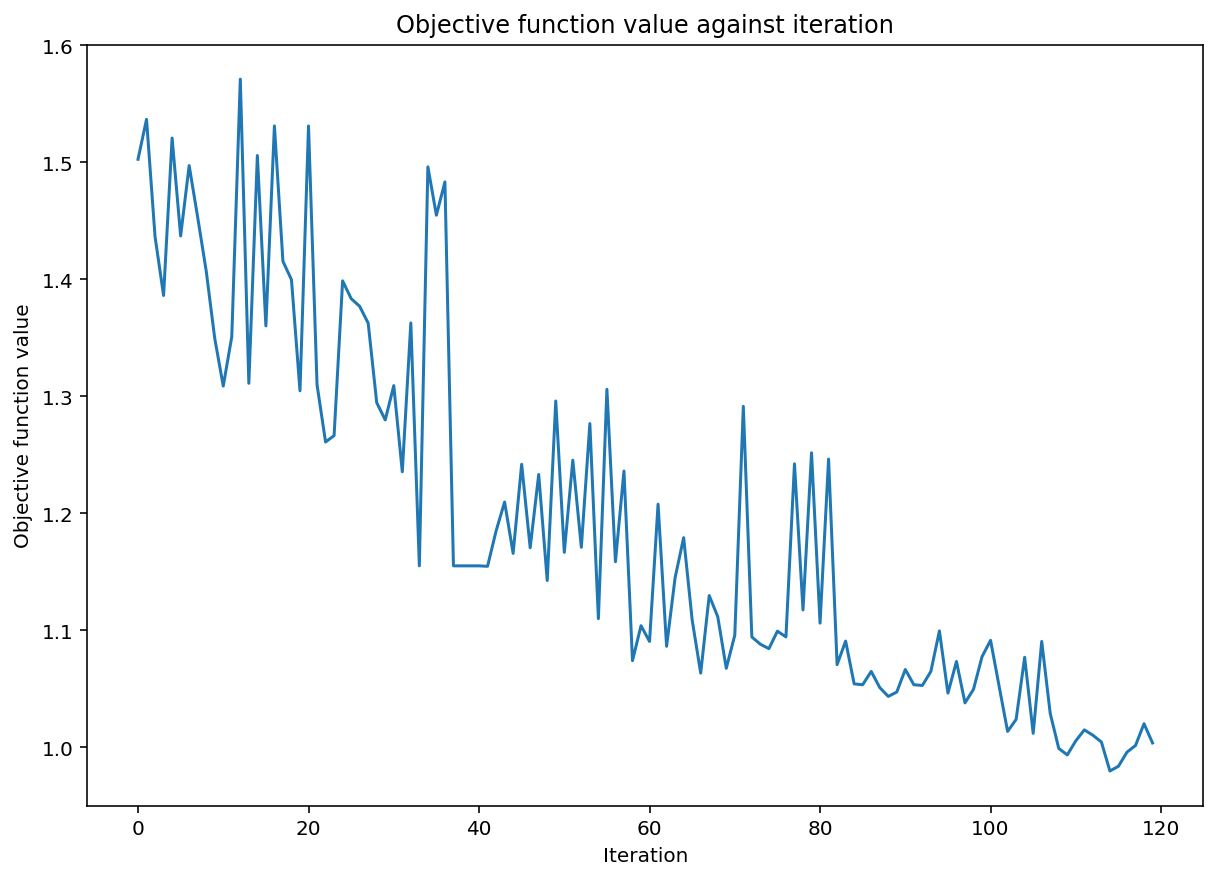

Time elapsed:  289.55419850349426


In [26]:
objective_func_vals = []

vqc.fit(X_train, y_train)

elapsed = time.time() - start

print("Time elapsed: ", elapsed)

plt.show()

In [27]:
print("Train score: ", vqc.score(X_train, y_train))
print("Test score: ", vqc.score(X_test, y_test))

Train score:  0.8833333333333333
Test score:  0.9
